In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:\\Users\HP\\OneDrive\\Desktop\\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
print(f"the shape of the dataset is {df.shape}")

the shape of the dataset is (142193, 24)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
print(f"The columns in this dataset are: \n{df.columns}")

The columns in this dataset are: 
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [7]:
#converting Date column to Date_Time format

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'], inplace=True)

In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,NaN,NaN,9.4,20.9,No,0.0,No,2017,6,20
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,NaN,NaN,10.1,22.4,No,0.0,No,2017,6,21
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,NaN,NaN,10.9,24.5,No,0.0,No,2017,6,22
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,NaN,NaN,12.5,26.1,No,0.0,No,2017,6,23


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [10]:
for i in df.columns:
    print(f"the unique values in {i} are {df[i].unique()}")
    print()

the unique values in Location are ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

the unique values in MinTemp are [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  9.8 14.1
 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3  9.6
 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6 19.3
 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5 28.3
 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8  

the unique values in WindSpeed9am are [ 20.   4.  19.  11.   7.   6.  15.  17.  28.  24.  nan   9.   0.  13.
   2.  26.  30.  22.  35.  37.  31.  33.  48.  39.  44.  41.  46.  43.
  56.  83.  74.  52.  65.  50. 130.  54.  61.  57.  59.  87.  67.  63.
  69.  72.]

the unique values in WindSpeed3pm are [24. 22. 26.  9. 20. 17. 28. 11.  6. 13. 19. 30. 31.  7. 15. 48.  4. 33.
  0.  2. nan 37. 46. 39. 50. 35. 44. 41. 43. 56. 61. 54. 52. 83. 65. 78.
 57. 63. 59. 74. 72. 69. 76. 87. 67.]

the unique values in Humidity9am are [ 71.  44.  38.  45.  82.  55.  49.  48.  42.  58.  89.  76.  65.  50.
  69.  80.  47.  56.  54.  41.  78.  46.  43.  33.  34.  36.  52.  51.
  40.  35.  39.  60.  37.  27.  32.  53.  20.  66.  63.  57.  62.  87.
  61.  59.  92.  72.  67.  75.  88.  68.  73.  74.  83.  77.  70.  81.
  86.  97.  99.  91.  85.  93.  84.  94.  79.  98.  96.  95.  90.  64.
  29.  21. 100.  24.  nan  25.  31.  18.  23.  26.  28.  30.  19.  22.
  17.  15.   9.  12.  13.  16.   6.  10.  14.  11.

the unique values in RainToday are ['No' 'Yes' nan]

the unique values in RISK_MM are [0.000e+00 1.000e+00 2.000e-01 1.400e+00 2.200e+00 1.560e+01 3.600e+00
 1.680e+01 1.060e+01 1.200e+00 8.000e-01 6.000e-01 6.400e+00 4.000e-01
 3.000e+00 5.800e+00 1.160e+01 1.800e+00 8.600e+00 1.260e+01 8.400e+00
 6.200e+00 2.000e+01 2.100e+01 3.200e+00 4.800e+00 4.200e+00 8.000e+00
 1.440e+01 4.600e+00 2.000e+00 5.600e+00 1.600e+00 6.000e+00 4.400e+00
 5.400e+00 5.000e+00 7.800e+00 6.800e+00 9.800e+00 3.800e+00 2.400e+00
 5.200e+00 6.600e+00 1.340e+01 1.020e+01 2.880e+01 7.000e+00 2.580e+01
 9.400e+00 1.240e+01 5.220e+01 2.060e+01 6.600e+01 1.100e+01 1.700e+01
 1.040e+01 2.800e+01 2.140e+01 1.860e+01 7.200e+00 8.200e+00 1.080e+01
 1.540e+01 9.600e+00 4.000e+00 2.180e+01 2.080e+01 2.480e+01 1.000e+01
 1.140e+01 1.900e+01 2.220e+01 3.280e+01 3.400e+00 5.080e+01 5.260e+01
 1.920e+01 1.880e+01 1.480e+01 1.200e+01 1.840e+01 2.560e+01 3.500e+01
 1.420e+01 1.380e+01 2.600e+00 9.920e+01 5.100e+01 3.980e+01 2

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

# Handling missing data

In [12]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(f'numerical_features {numerical_features}')
print(f'discrete_features {discrete_features}')
print(f'continuous_features {continuous_features}')

numerical_features ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']
discrete_features ['Cloud9am', 'Cloud3pm', 'Year', 'Month']
continuous_features ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Day']


In [14]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [16]:
for feature in continuous_features:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())


In [17]:
df.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [18]:
for feature in discrete_features:
    if(df[feature].isnull().sum()):
        df[feature] = df[feature].fillna(df[feature].mode().index[0])


In [19]:
df.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [20]:
for feature in categorical_features:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [21]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [22]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow,No,Yes
Location,,
Adelaide,2402,688
Albany,2114,902
Albury,2393,618
AliceSprings,2787,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


<AxesSubplot:>

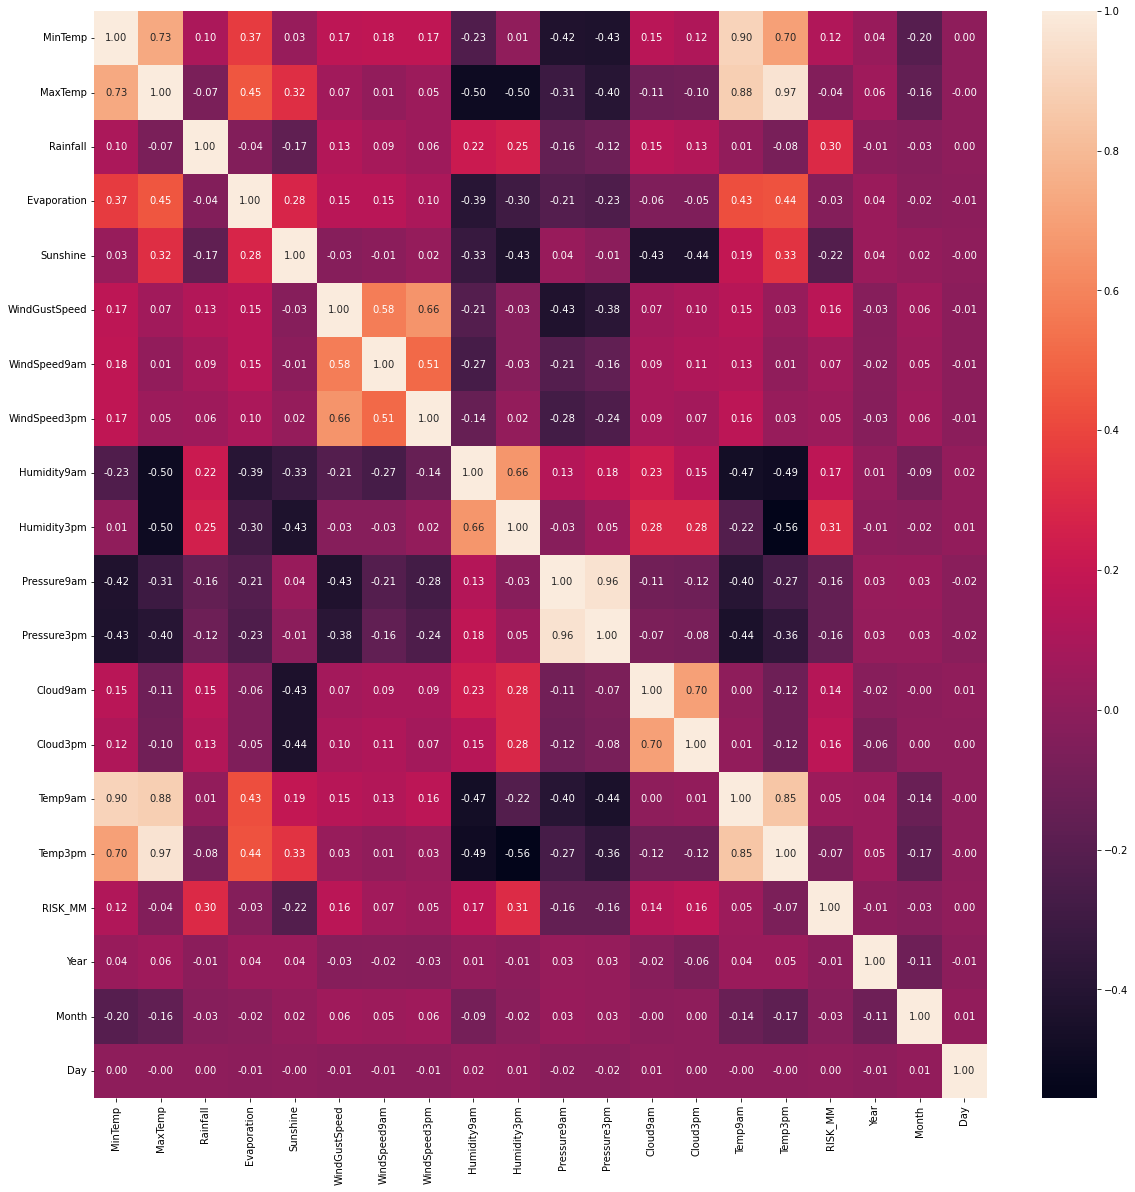

In [23]:
#Correlation Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True, fmt='.2f')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,8.0,0.0,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,0.0,0.0,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,0.0,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,0.0,0.0,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


# converting the categorical features into numeric using Label Encoder

In [26]:
col = [feature for feature in categorical_features]
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i])

In [27]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,8.0,0.0,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,0.0,0.0,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,0.0,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,0.0,0.0,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int32  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int32  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int32  
 9   WindDir3pm     142193 non-null  int32  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [29]:
df.to_csv('preprocessed_data.csv')

# Visualization

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


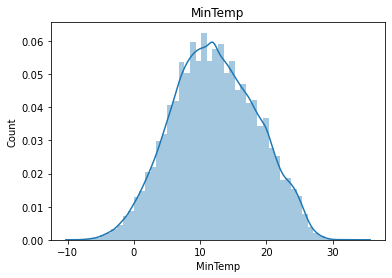

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


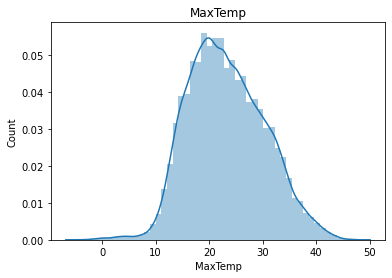

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


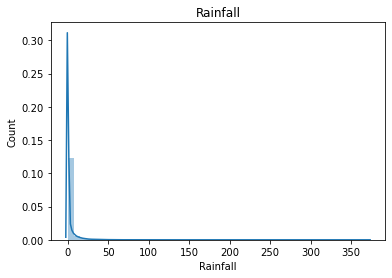

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


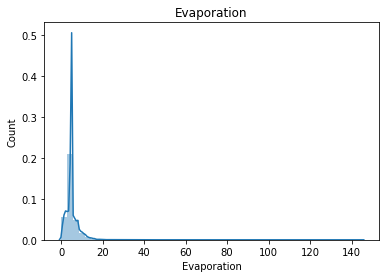

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


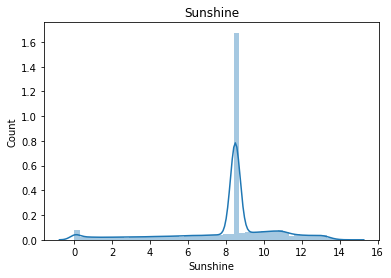

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


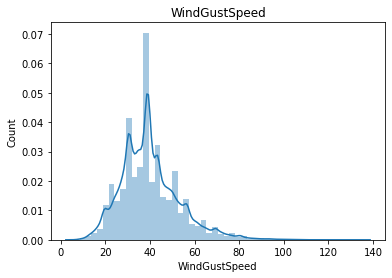

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


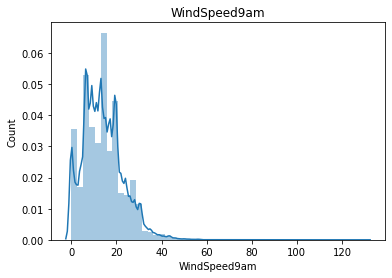

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


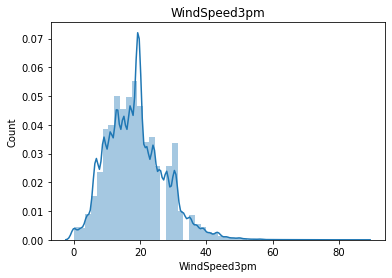

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


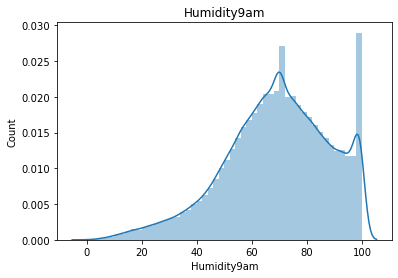

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


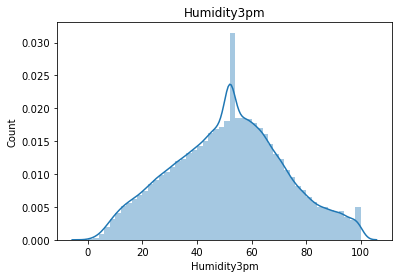

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


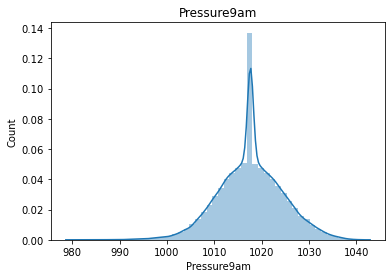

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


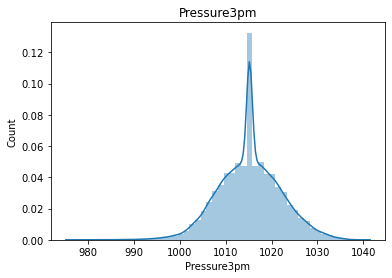

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


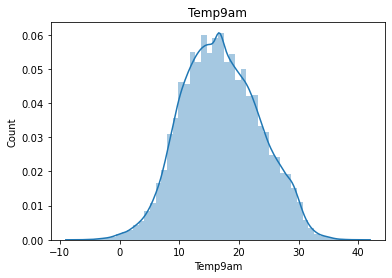

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


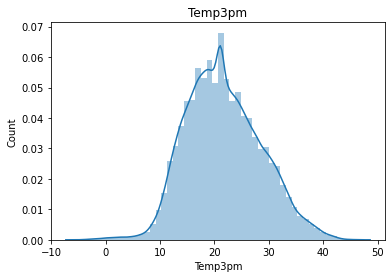

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


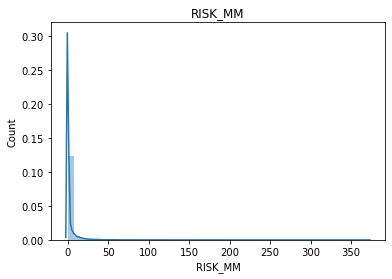

<Figure size 1080x1080 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


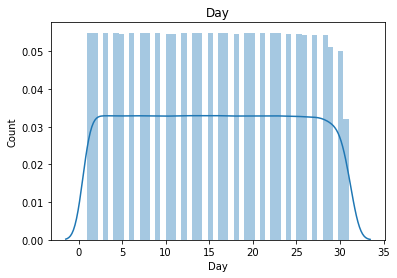

<Figure size 1080x1080 with 0 Axes>

In [30]:
for feature in continuous_features:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

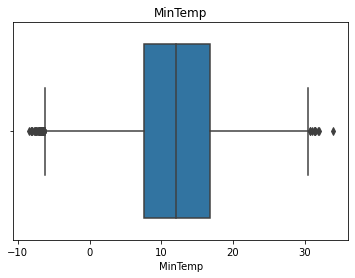

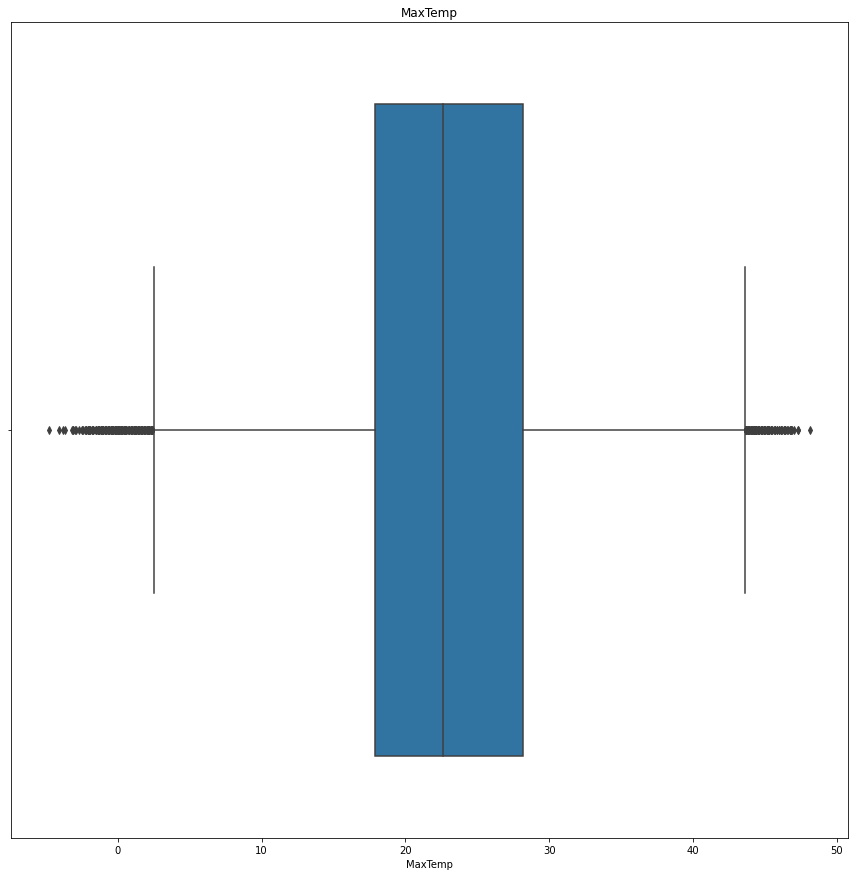

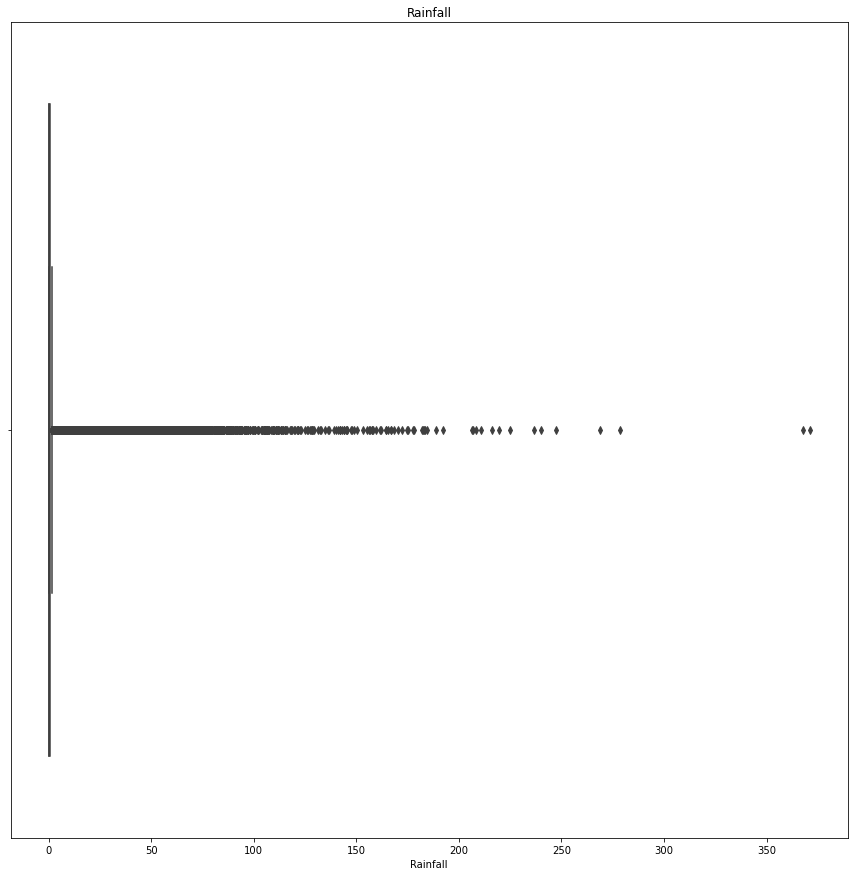

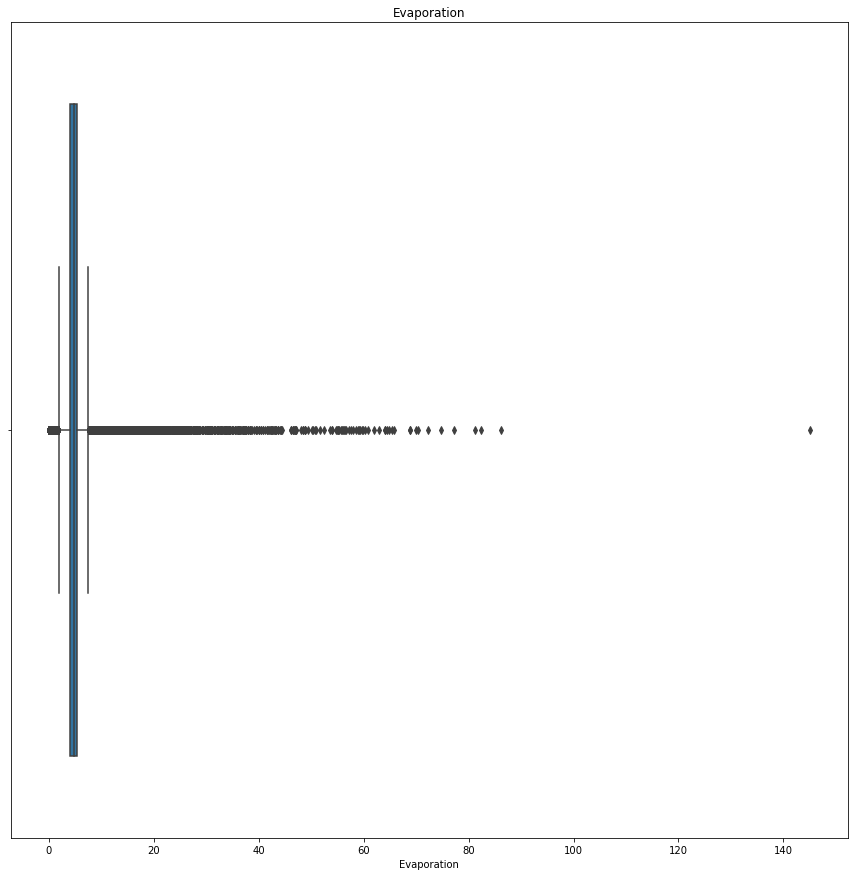

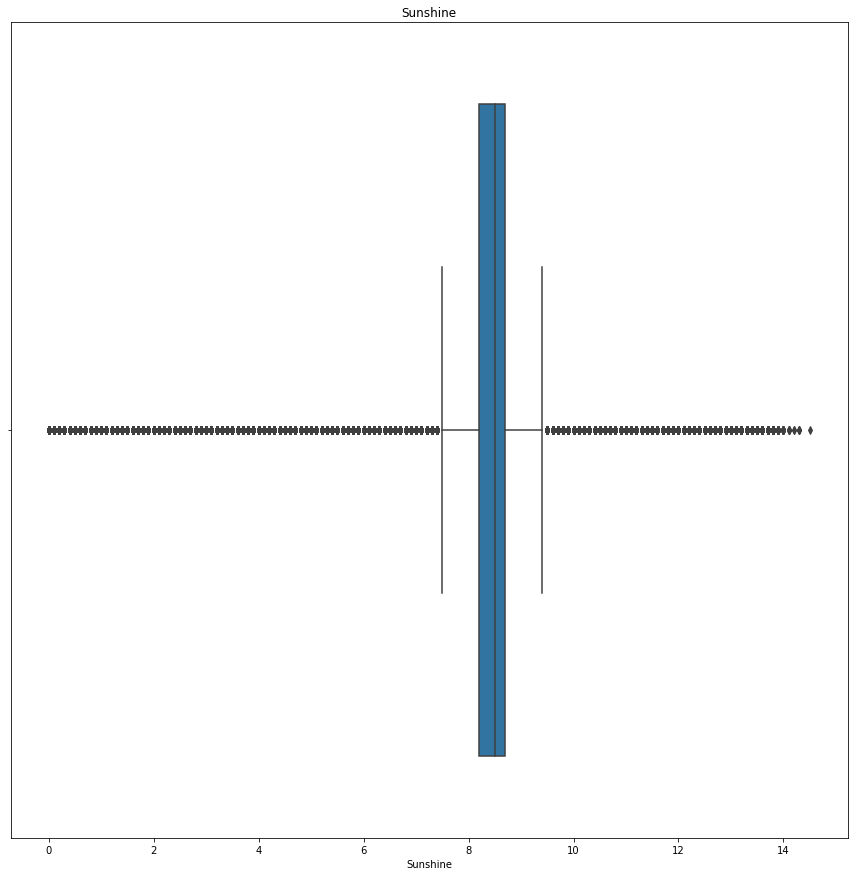

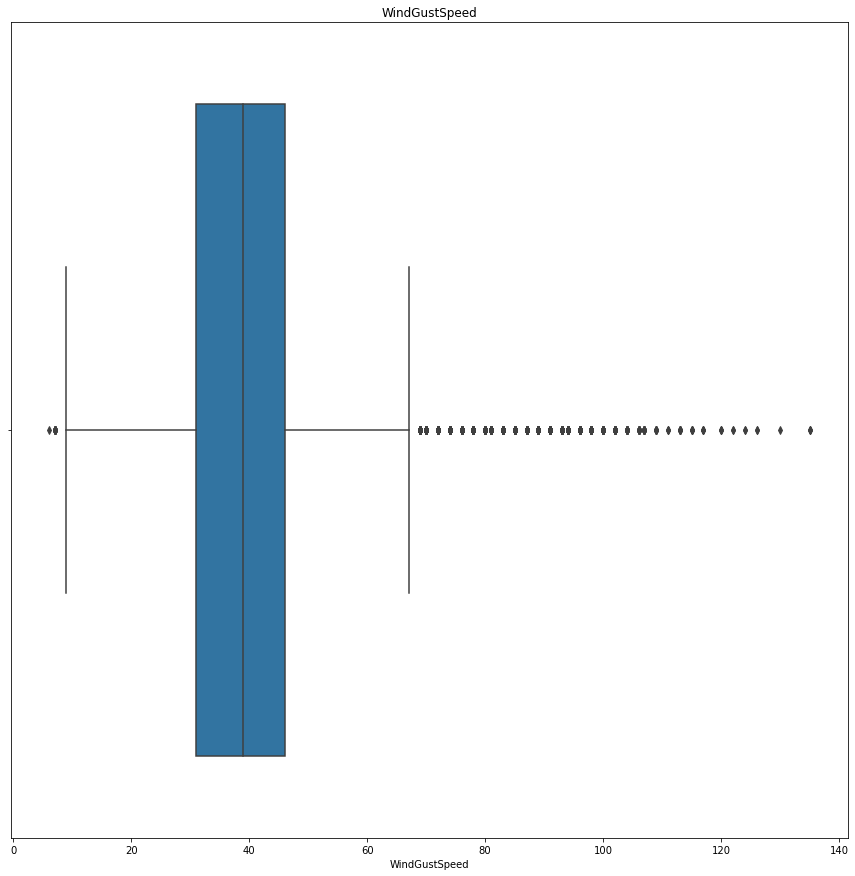

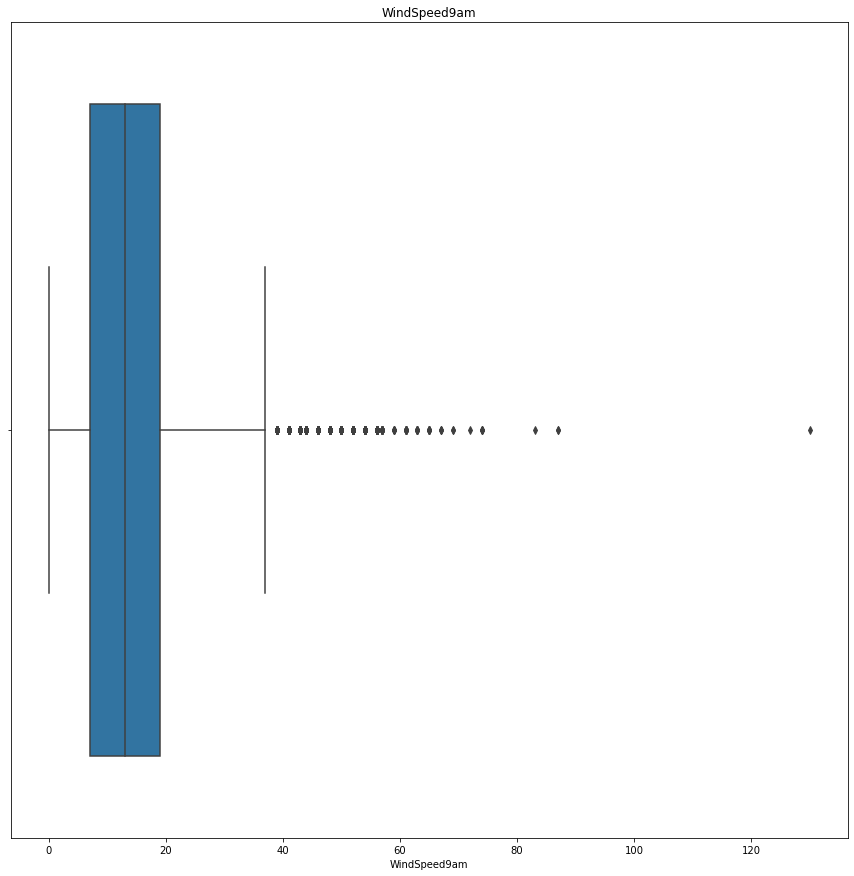

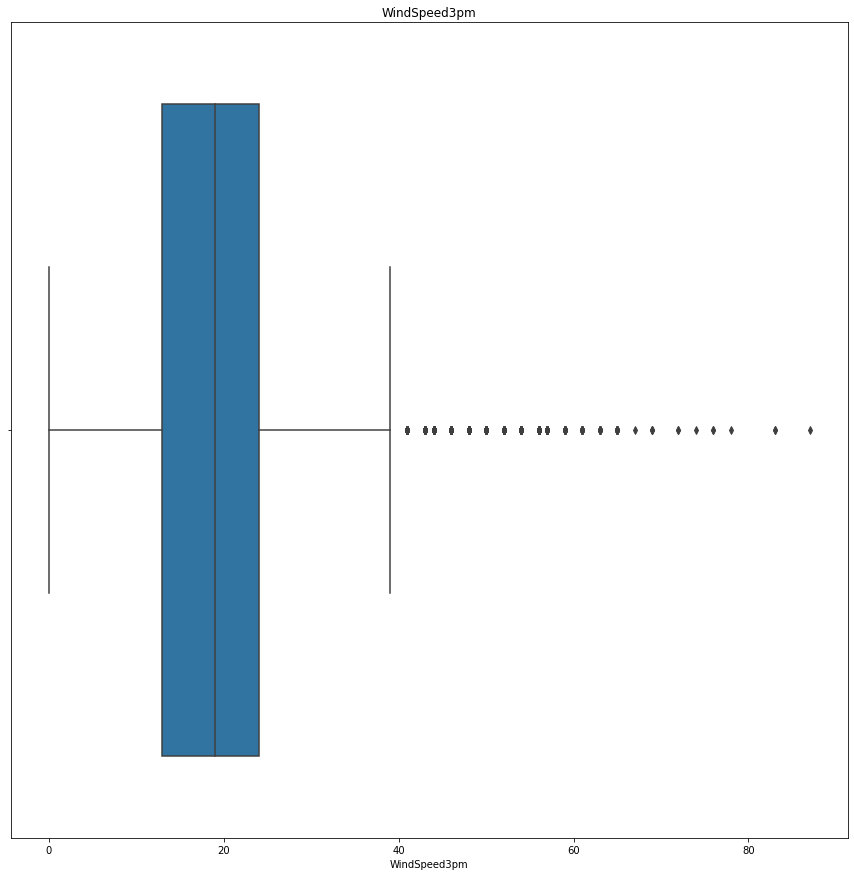

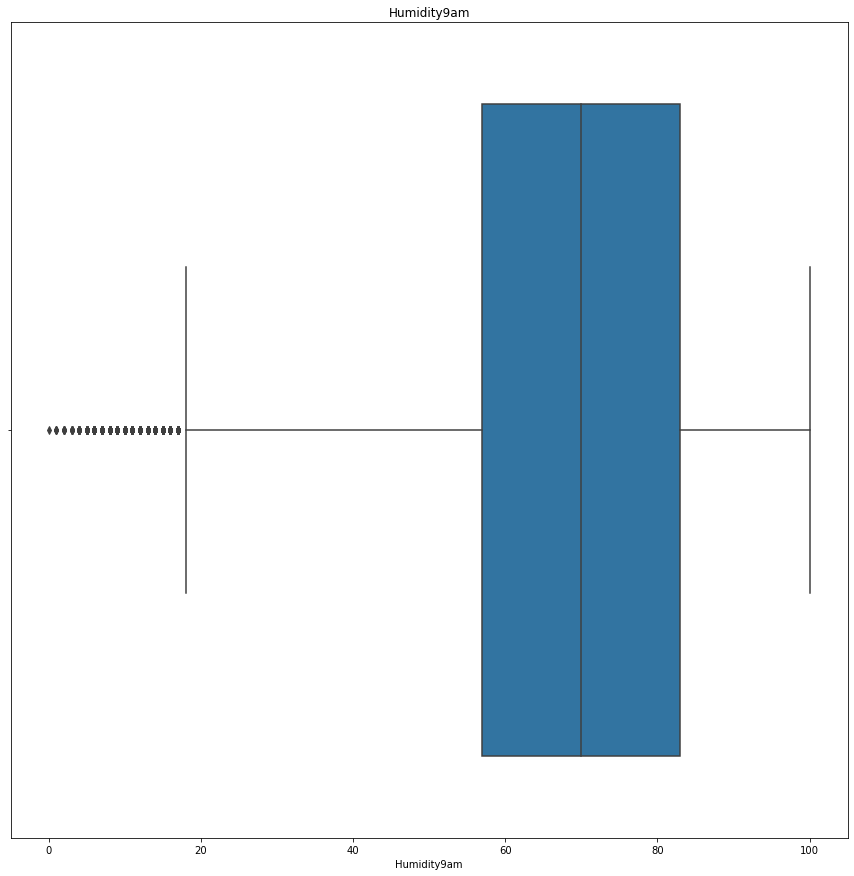

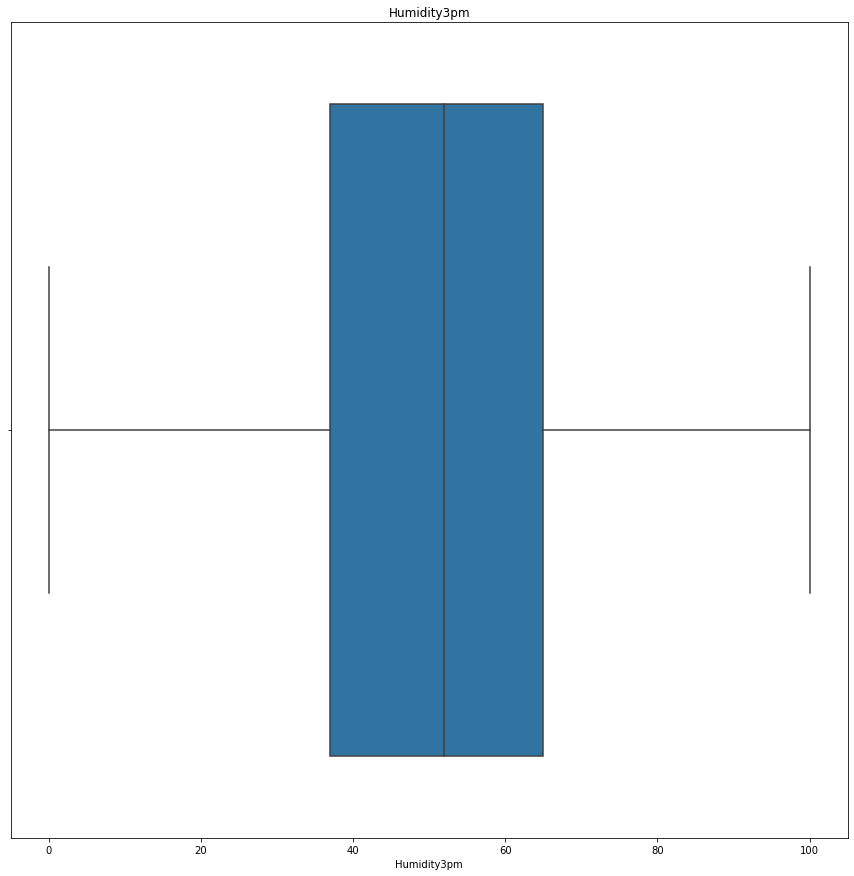

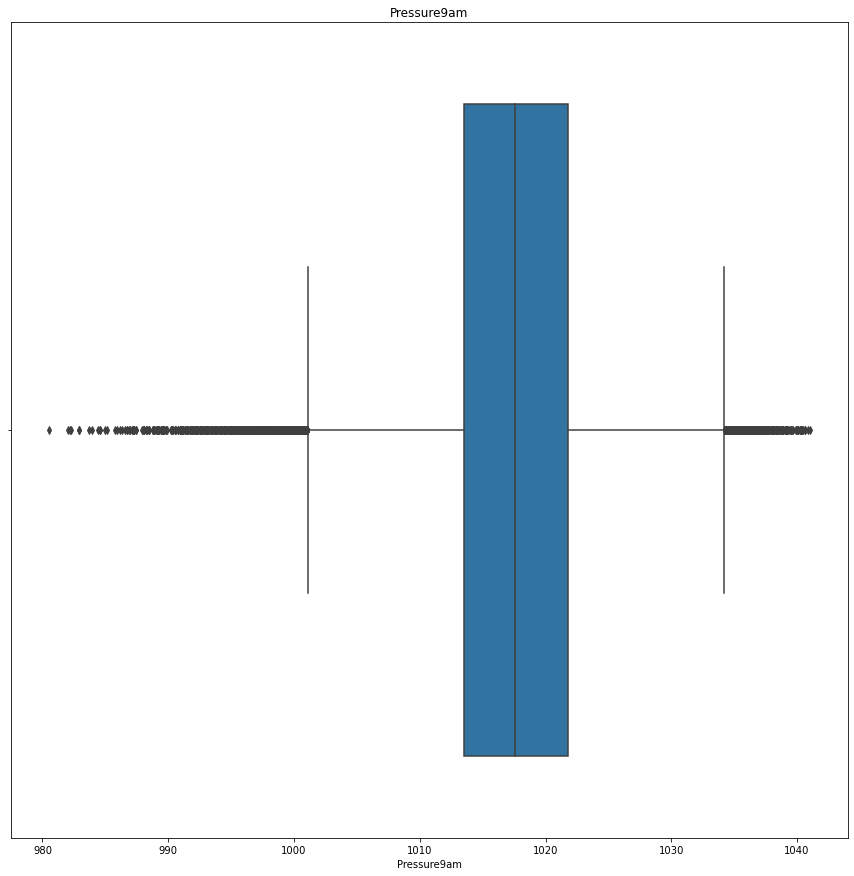

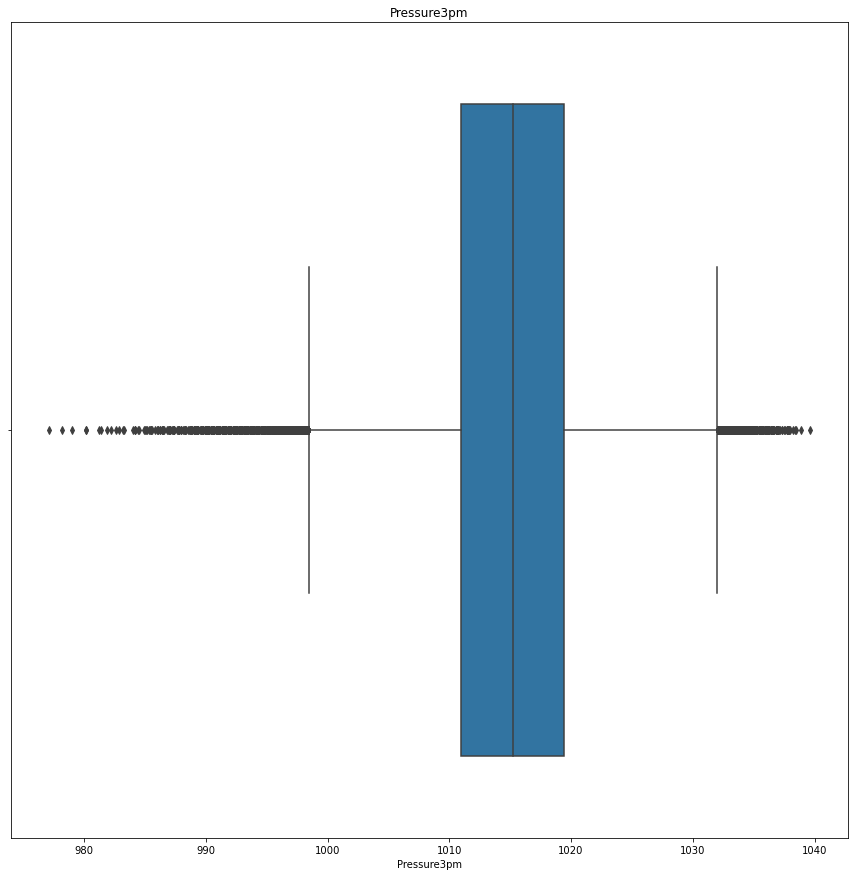

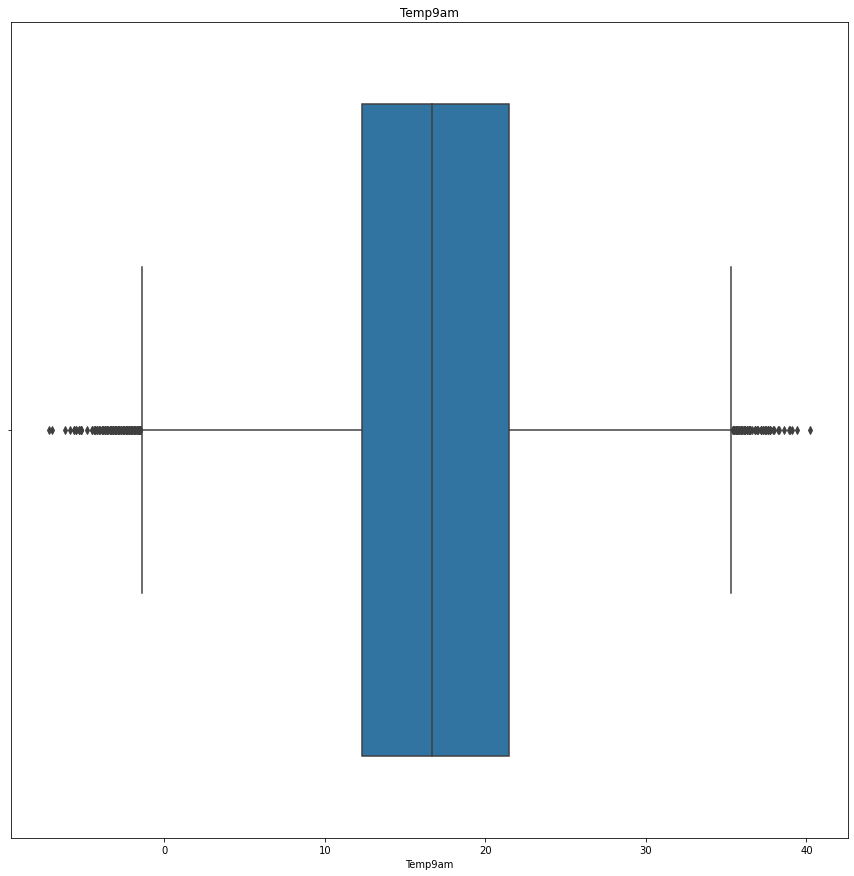

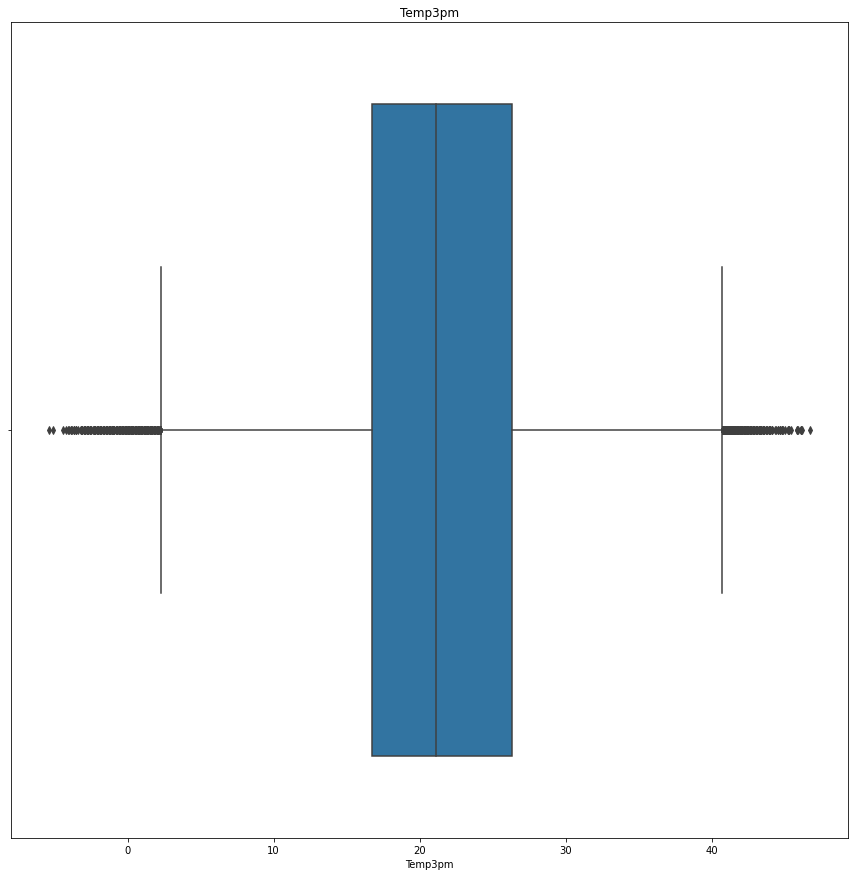

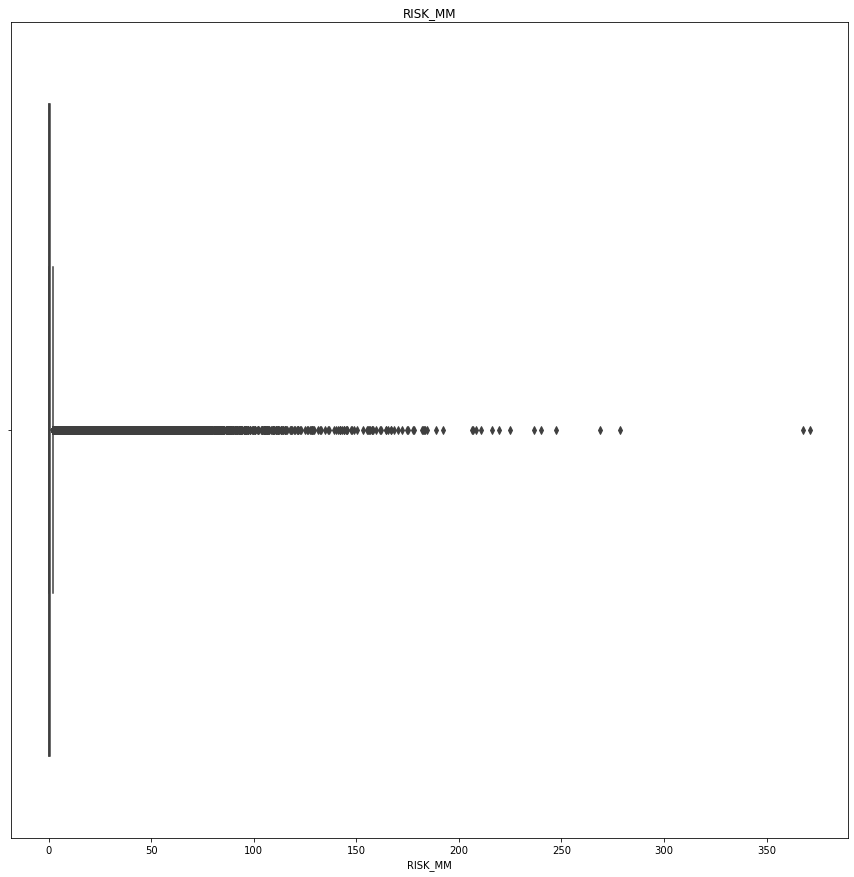

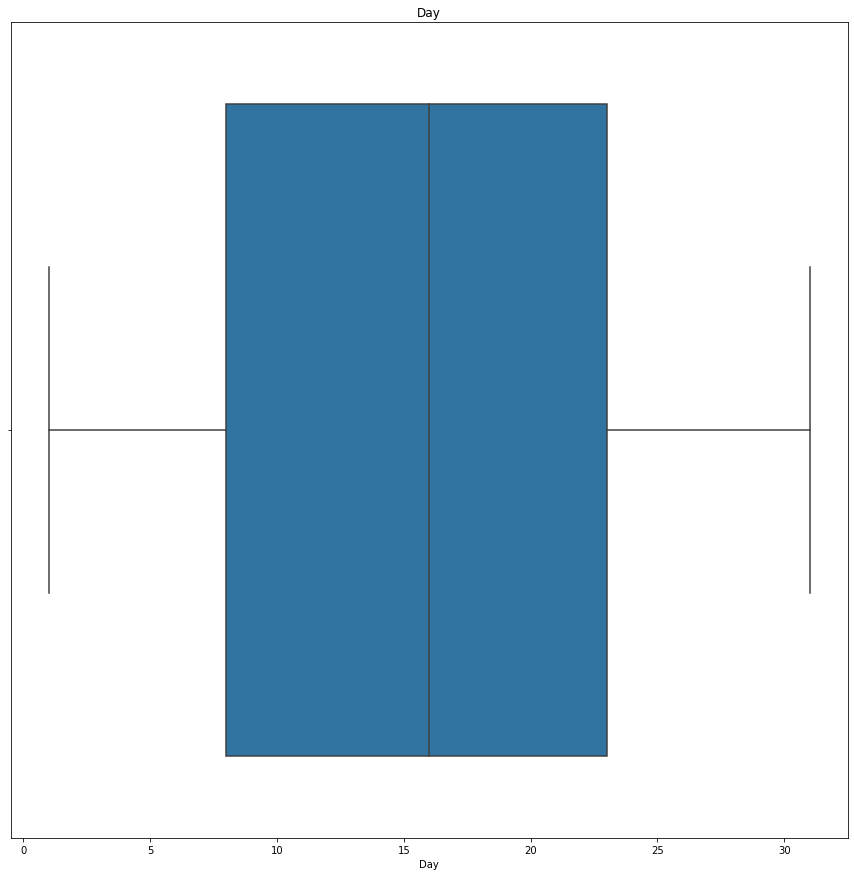

<Figure size 1080x1080 with 0 Axes>

In [31]:
for feature in continuous_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [32]:
df.shape

(142193, 26)

# splitting the data into the features and target_feature(X, y)

In [33]:
X = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [34]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (142193, 25)
The shape of y is (142193,)


In [35]:
#Standardizing Data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,0.041667,0.516509,0.523629,0.001617,0.033103,0.586207,0.866667,0.294574,0.866667,0.933333,...,0.4800,0.888889,0.000000,0.508439,0.522073,0.0,0.000000,0.1,1.0,0.000000
1,0.041667,0.375000,0.565217,0.000000,0.033103,0.586207,0.933333,0.294574,0.400000,1.000000,...,0.4912,0.000000,0.000000,0.514768,0.570058,0.0,0.000000,0.1,1.0,0.033333
2,0.041667,0.504717,0.576560,0.000000,0.033103,0.586207,1.000000,0.310078,0.866667,1.000000,...,0.5056,0.000000,0.222222,0.594937,0.548944,0.0,0.000000,0.1,1.0,0.066667
3,0.041667,0.417453,0.620038,0.000000,0.033103,0.586207,0.266667,0.139535,0.600000,0.000000,...,0.5712,0.000000,0.000000,0.533755,0.612284,0.0,0.002695,0.1,1.0,0.100000
4,0.041667,0.613208,0.701323,0.002695,0.033103,0.586207,0.866667,0.271318,0.066667,0.466667,...,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.000539,0.1,1.0,0.133333


In [36]:
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [37]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (99535, 25)
The shape of y_train is (99535,)
The shape of X_test is (42658, 25)
The shape of y_test is (42658,)


# logistic regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of the model is: 0.8987528716770594
Confusion matrix is: 
 AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     33017
           1       0.91      0.62      0.73      9641

    accuracy                           0.90     42658
   macro avg       0.90      0.80      0.84     42658
weighted avg       0.90      0.90      0.89     42658



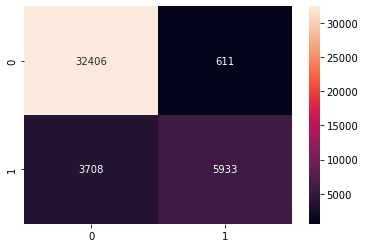

In [38]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f'Accuracy Score of the model is: {accuracy_score(y_test, y_pred_lr)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot = True, fmt = 'd')}")
print(classification_report(y_test, y_pred_lr))

# Random Forest Classifier

Accuracy Score of the model is: 1.0
Confusion matrix is: 
 AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33017
           1       1.00      1.00      1.00      9641

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



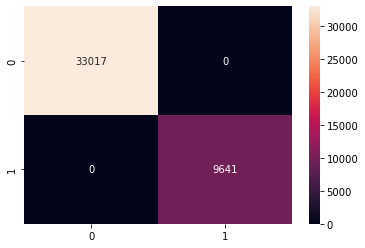

In [39]:
rf_model = RandomForestClassifier(max_depth = 2, n_estimators = 10, n_jobs = 1, random_state = 1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


print(f'Accuracy Score of the model is: {accuracy_score(y_test, y_pred_rf)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot = True, fmt = 'd')}")
print(classification_report(y_test, y_pred_rf))

#### cross-validation using the Gridsearchcv

In [40]:
params = {'n_estimators':[10,20,30], 'max_depth':[2,4,6], 'n_jobs':[1,2,4], 'random_state':[1,2,3]}
gsv_rf = GridSearchCV(RandomForestClassifier(), params, scoring= 'accuracy')
gsv_rf.fit(X, y)

print(f'The best estimator is {gsv_rf.best_estimator_}')
print(f'The best parameters are {gsv_rf.best_params_}')
print(f'The best score is {gsv_rf.best_score_}')

The best estimator is RandomForestClassifier(max_depth=2, n_estimators=10, n_jobs=1, random_state=1)
The best parameters are {'max_depth': 2, 'n_estimators': 10, 'n_jobs': 1, 'random_state': 1}
The best score is 1.0


# Support Vector Classifier

Accuracy Score of the model is: 0.8970884710956913
Confusion matrix is: 
 AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     33017
           1       0.94      0.58      0.72      9641

    accuracy                           0.90     42658
   macro avg       0.91      0.79      0.83     42658
weighted avg       0.90      0.90      0.89     42658



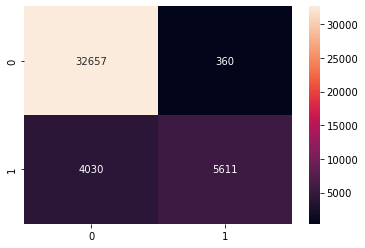

In [41]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print(f'Accuracy Score of the model is: {accuracy_score(y_test, y_pred_svc)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot = True, fmt = 'd')}")
print(classification_report(y_test, y_pred_svc))

# Adaboost classifier

Accuracy Score of the model is: 1.0
Confusion matrix is: 
 AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33017
           1       1.00      1.00      1.00      9641

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



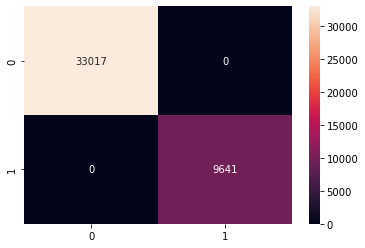

In [42]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print(f'Accuracy Score of the model is: {accuracy_score(y_test, y_pred_ada)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test,y_pred_ada), annot = True, fmt = 'd')}")
print(classification_report(y_test, y_pred_ada))

In [43]:
data = {'Model':['Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine', 'AdaBoost Classifier'], 'Accuracy Scores':[accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_ada)]}
print(pd.DataFrame(data))

                      Model  Accuracy Scores
0       Logistic Regression         0.898753
1  Random Forest Classifier         1.000000
2    Support Vector Machine         0.897088
3       AdaBoost Classifier         1.000000
